In [1]:
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from common.benchmark import BenchmarkResult
from common.utils import *

from lab2.runners import *
from numpy import cos
from numpy import exp
from numpy import pi

In [5]:
%load_ext autoreload
%autoreload 2

In [2]:
def f(x: float, y: float) -> float:
    return (x - 1) ** 2 + y ** 2


TARGET = Vector(1, 0)
PROBLEM = lambda: Oracle(f, TARGET)
runners = list(map(lambda r: r(PROBLEM(), Vector(3, 2)), RunnerMeta.runners))

b = BenchmarkResult.compare(runners)

--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner


In [4]:
b.top("accuracy")

sorted by accuracy
| name                |   accuracy |   queries |       time |
|---------------------+------------+-----------+------------|
| NewtonConstRunner   | 0.00070711 |        24 | 0.00086410 |
| NewtonSearchRunner  | 0.00106151 |       132 | 0.00188460 |
| WolfeRunner         | 0.00163661 |       138 | 0.00237000 |
| ScipyNewtonCGRunner | 0.00707107 |        18 | 0.00240990 |


In [4]:
# можно так

experiments = []
v = Vector(15, 15)
for i in range(2, 10):
    
    runners = [
        NewtonConstRunner(PROBLEM(), v, NewtonConstOptions(
            exit_condition_threshold= 10 ** (-i)
        )),
        NewtonSearchRunner(PROBLEM(), v, NewtonSearchOptions(
            exit_condition_threshold= 10 ** (-i)
        ))
    ]
    experiments.append(runners)
b = BenchmarkResult.series(experiments)

running experiment 1
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 2
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 3
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 4
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 5
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 6
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 7
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 8
--running NewtonConstRunner
--running NewtonSearchRunner


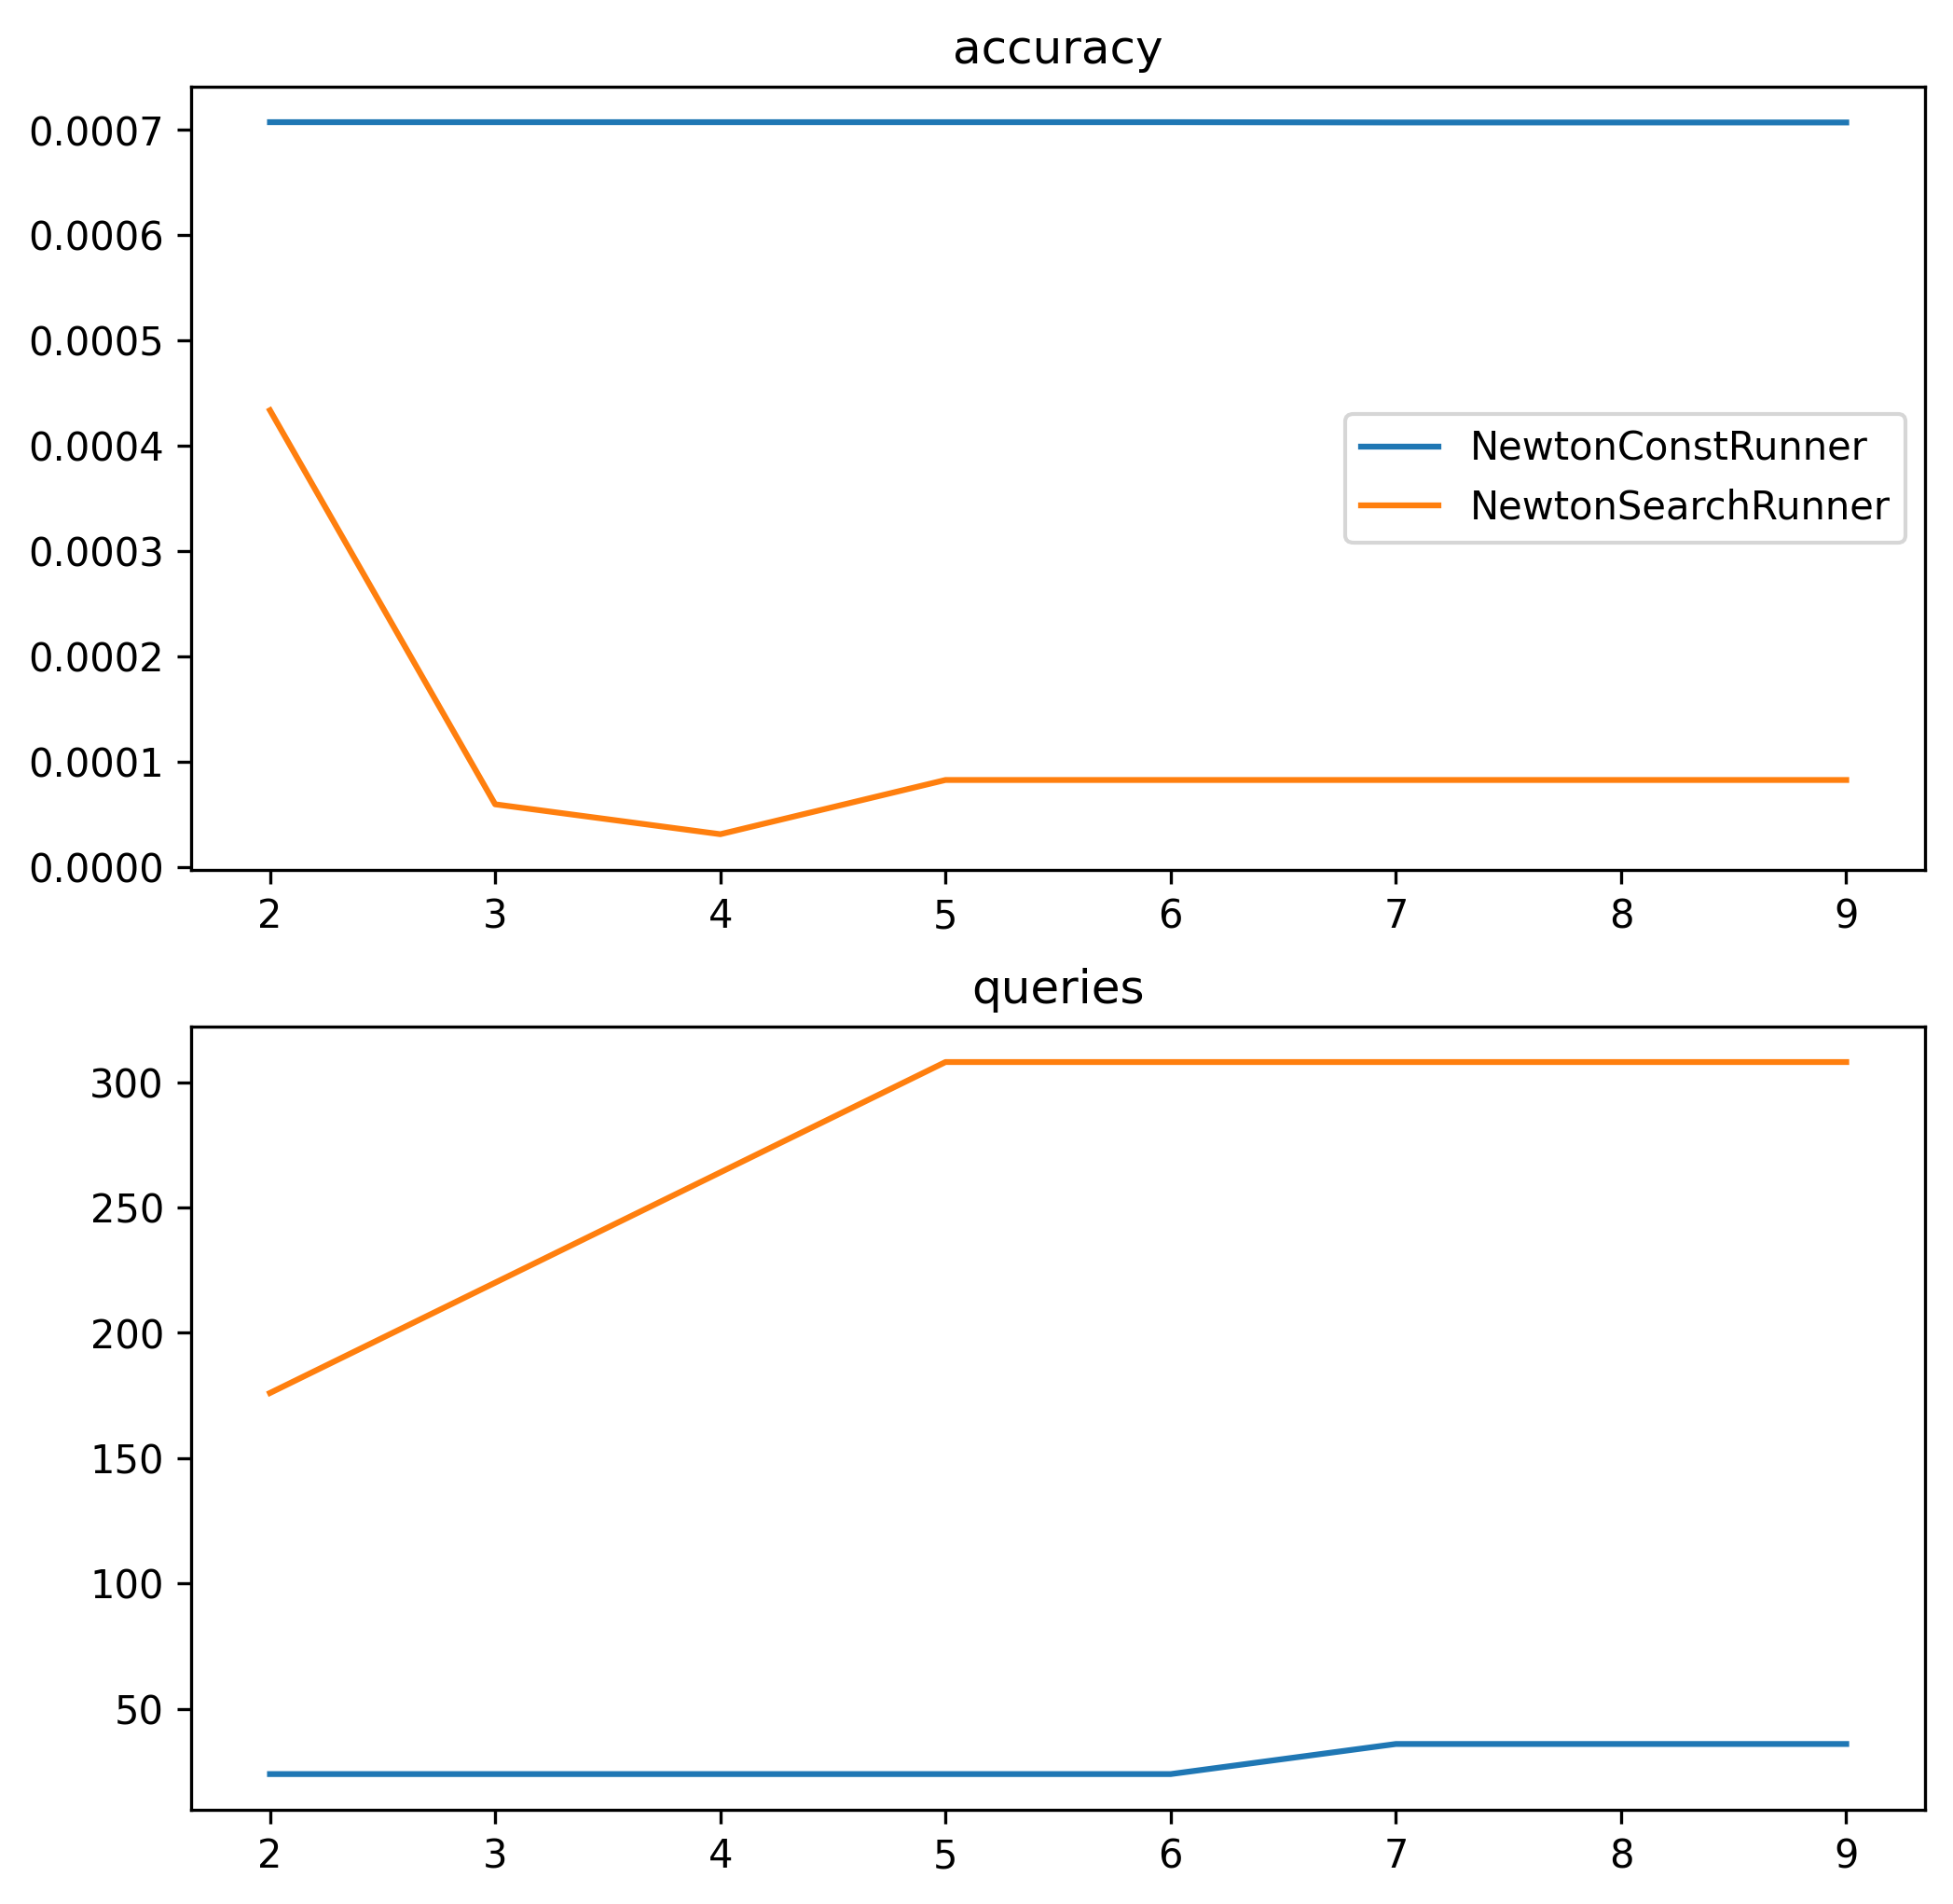

In [5]:
BenchmarkResult.plot_results(b, ("accuracy", "queries"), list(map(str, range(2, 10))))

In [6]:
# или так
params = []
for i in range(2, 10):
    params.append(dict(
        o=PROBLEM(),
        start=Vector(15, 15),
        override_opts={
            'exit_condition_threshold': 10 ** (-i)
        }
    ))

b = BenchmarkResult.series(RunnerMeta.runners, params)


running experiment 1
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 2
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 3
--running NewtonConstRunner
--running WolfeRunner


KeyboardInterrupt: 